Loading the models

In [1]:
from joblib import load
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sys import path
path.append("..")
from config import *

#setting the random seed
random_seed = 46
np.random.seed(random_seed)
random.seed(random_seed)

jobs = -1 #this is the number of cores that the models and test will run on. -1 means that all cores will be used 

#loading in the models and datasets
reg = load(MODEL_FOLDER + "/lin_reg.joblib")
gbr_init = load(MODEL_FOLDER + "/gbr_init.joblib")
gbr_imp = load(MODEL_FOLDER + "/gbr_improved.joblib")
gbr_imp_2 = load(MODEL_FOLDER + "/gbr_improved_2.joblib")
gbr_imp_3 = load(MODEL_FOLDER + "/gbr_improved_3.joblib")
xtratree = load(MODEL_FOLDER + "/xtra_tree.joblib")
randfor = load(MODEL_FOLDER + "/rfr.joblib")
dectree = load(MODEL_FOLDER + "/dec_tree.joblib")


dataset = pd.read_csv(DATA_FOLDER + "/model_dataset.csv")
master_dataset = pd.read_csv(DATA_FOLDER + "/master_dataset.csv")
master_dataset = master_dataset[master_dataset["cases_hrs"] <= 300]
master_dataset = master_dataset[master_dataset["Total_Hours"] >= 10]


models = []


Model Evaluation

In [2]:
#testing the models 

X_train, X_test, y_train, y_test = train_test_split(dataset.drop(labels="cases_hrs", axis=1),dataset['cases_hrs'], random_state=random_seed, train_size = .70)

X = X_test
y = y_test

#reg model
reg_pred = reg.predict(X)
models.append(["Base Linear Regression", mean_squared_error(reg_pred, y, squared=False), r2_score(reg_pred,y), reg.score(X, y)])

#gbr1 model
gbr_init_pred = gbr_init.predict(X)
models.append(["Base GBR", mean_squared_error(gbr_init_pred, y, squared=False), r2_score(gbr_init_pred,y), gbr_init.score(X, y)])

#improved gbr model
gbr_imp_pred = gbr_imp.predict(X)
models.append(["Improved GBR", mean_squared_error(gbr_imp_pred, y, squared=False), r2_score(gbr_imp_pred,y), gbr_imp.score(X, y)])

#improved gbr model 2.0
gbr_imp_2_pred = gbr_imp_2.predict(X)
models.append(["Improved GBR 2.0", mean_squared_error(gbr_imp_2_pred, y, squared=False), r2_score(gbr_imp_2_pred,y), gbr_imp_2.score(X, y)])

#improved gbr model 3.0
gbr_imp_3_pred = gbr_imp_3.predict(X)
models.append(["Improved GBR 3.0", mean_squared_error(gbr_imp_3_pred, y, squared=False), r2_score(gbr_imp_3_pred,y), gbr_imp_3.score(X, y)])

#xtra tree model
xtratree_pred = xtratree.predict(X)
models.append(["Xtra Tree", mean_squared_error(xtratree_pred, y, squared=False), r2_score(xtratree_pred,y), xtratree.score(X, y)])

#RFR model
randfor_pred = randfor.predict(X)
models.append(["RFR", mean_squared_error(randfor_pred, y, squared=False), r2_score(randfor_pred,y), randfor.score(X, y)])

#Dec Tree model
dectree_pred = dectree.predict(X)
models.append(["Decision Tree", mean_squared_error(dectree_pred, y, squared=False), r2_score(dectree_pred,y), dectree.score(X, y)])


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.1s finished


Model Presentation

In [7]:
#NOTE: I think model score and R2 are both supposed to be the same, but they give out different scores so idk
models_pres = pd.DataFrame(models, columns=["Model", "RMSE", "R2", "Model Score"])
#models_pres

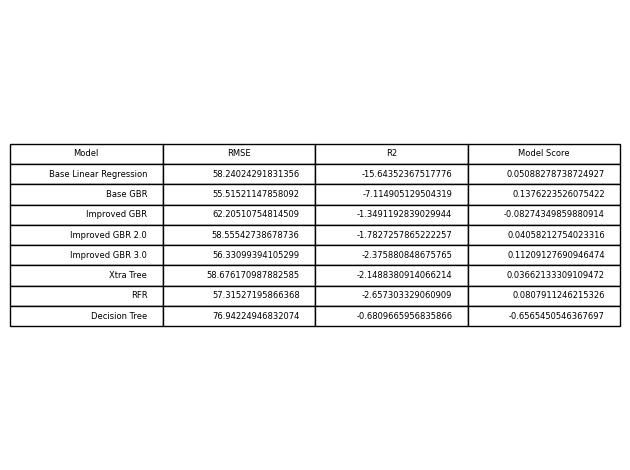

In [6]:
fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis("off")
ax.axis("tight")
table = ax.table(cellText=models_pres.values, colLabels = models_pres.columns, loc="center")

fig.tight_layout()
plt.show()

GBR 3.0 Feature Importnace & Permutation importance plot

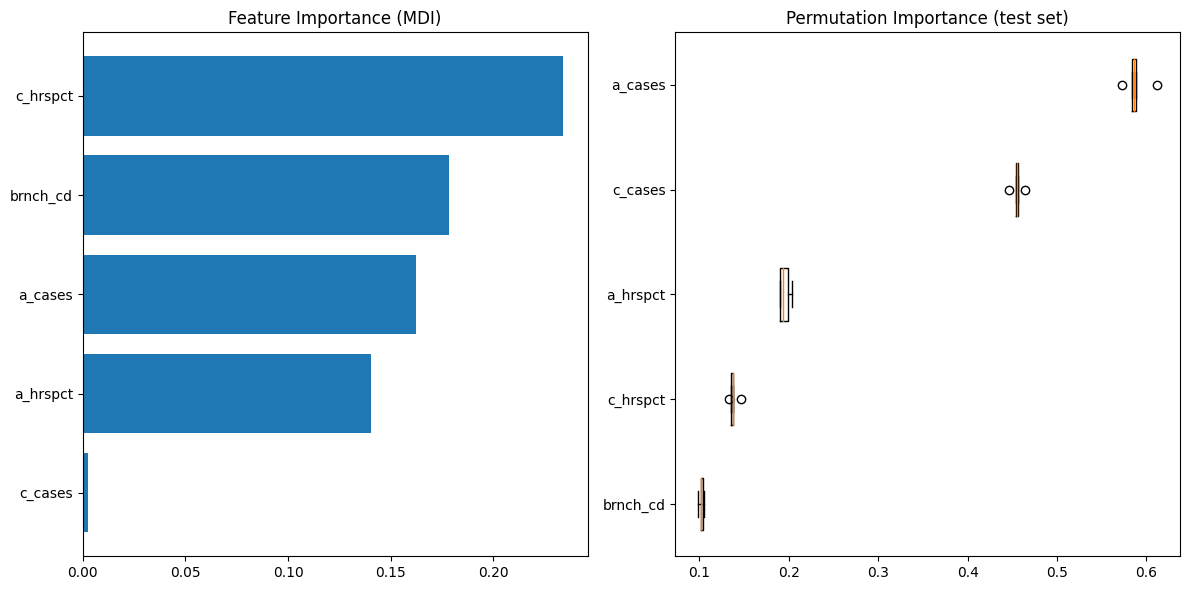

In [5]:
#gbr 3 Feature importance / Permutation importance plot 
feature_importance = gbr_imp_3.steps[1][1].feature_importances_
sorted_idx = np.argsort(feature_importance[:5])
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")


gbr_result = permutation_importance(
    gbr_imp_3, X_test, y_test, n_repeats=5, random_state=random_seed, n_jobs=jobs
)

sorted_idx = gbr_result.importances_mean[:5].argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    gbr_result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_train.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

Xtratree Feature importance / Permutation importance plot

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent worke

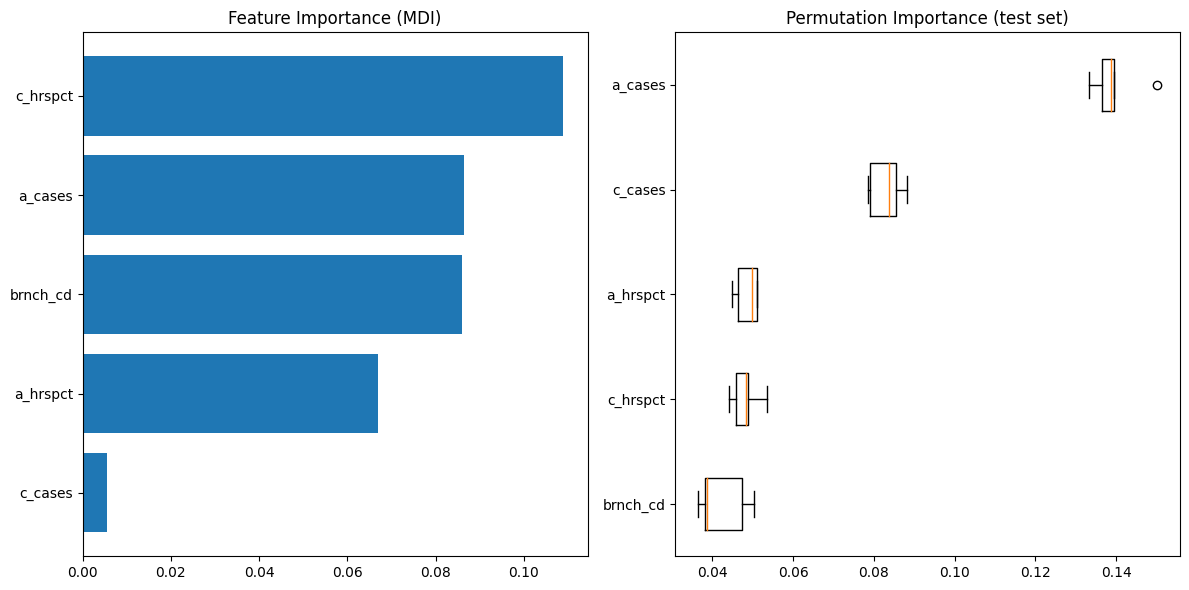

In [6]:
#Xtratree Feature importance / Permutation importance plot
feature_importance = xtratree.steps[1][1].feature_importances_
sorted_idx = np.argsort(feature_importance[:5])
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")


xtratree_result = permutation_importance(
    xtratree, X_test, y_test, n_repeats=5, random_state=random_seed, n_jobs=jobs
)

sorted_idx = xtratree_result.importances_mean[:5].argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    xtratree_result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_train.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()

Random Forest Feature importance plot & Permutation Test

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent worke

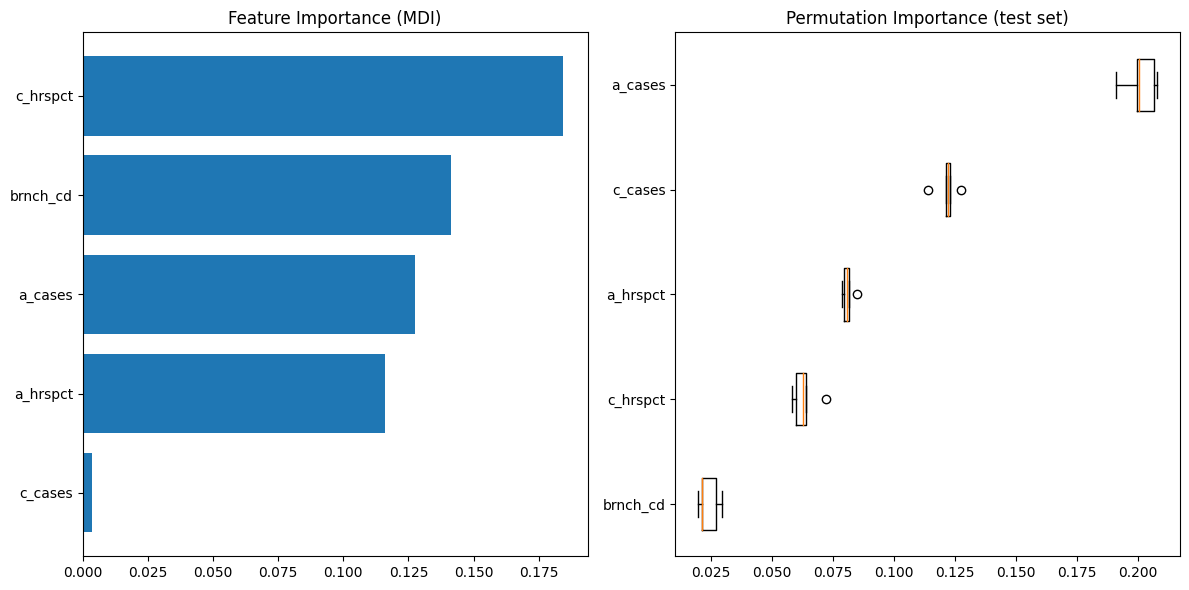

In [7]:
#Random Forest Feature importance plot 
feature_importance = randfor.steps[1][1].feature_importances_
sorted_idx = np.argsort(feature_importance[:5])
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

randfor_result = permutation_importance(
    randfor, X_test, y_test, n_repeats=5, random_state=random_seed, n_jobs=jobs
)

sorted_idx = randfor_result.importances_mean[:5].argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    randfor_result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_train.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()